In [1]:
import numpy as np
import pandas as pd
import math
pd.plotting.register_matplotlib_converters()

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

from numpy import loadtxt
#from xgboost import XGBClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
#import missingno as msno

In [2]:
data = pd.read_csv('E:\DATA SCI AND ML\Final Project\diamonds.csv')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
data.drop(['Unnamed: 0'],1, inplace = True)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
data.shape

(53940, 10)

In [5]:
datadrop = data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]
datadrop

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [6]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [7]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [11]:
data_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

data_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

data_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

In [12]:
data.cut = data.cut.map(data_cut);
data.clarity = data.clarity.map(data_clarity);
data.color = data.color.map(data_color);
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [13]:
from sklearn.feature_selection import RFE 


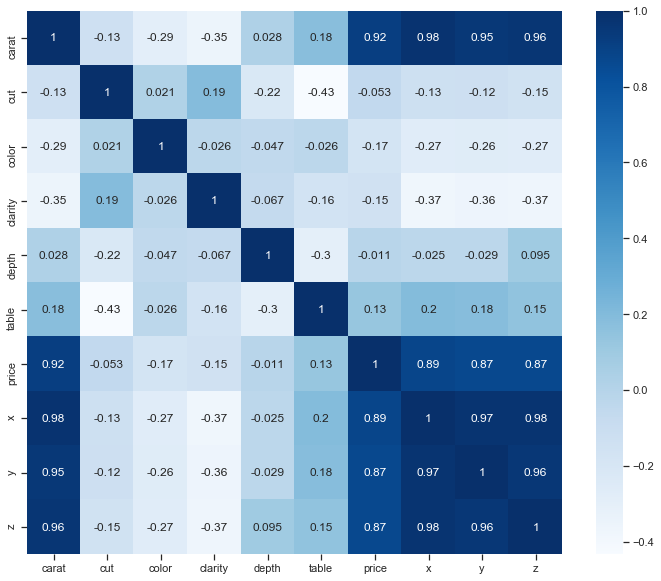

In [14]:
# Using Pearson Correlation 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Blues)
plt.show()

In [15]:
# correlation with output variable 
cor_target = abs(cor["price"])

# Selecting highly correlated features 
relevent_features = cor_target[cor_target>0.5]
relevent_features

carat    0.921592
price    1.000000
x        0.887231
y        0.867864
z        0.868206
Name: price, dtype: float64

In [16]:
data.drop(['depth'], axis=1, inplace=True)

Text(0, 0.5, 'Price')

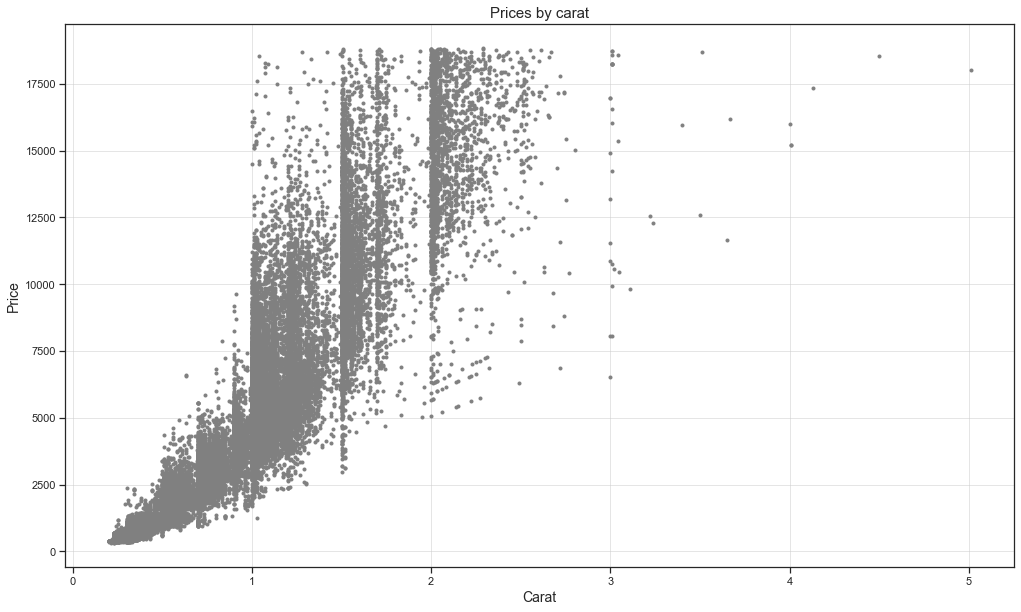

In [17]:
plt.figure(figsize=(17,10))
plt.scatter(x = "carat", y = "price", data = data, color = "Grey", marker = ".")
plt.grid(True, linewidth=0.5, )
plt.title("Prices by carat", fontsize = 15)
plt.xlabel("Carat", fontsize = 14)
plt.ylabel("Price", fontsize = 14)

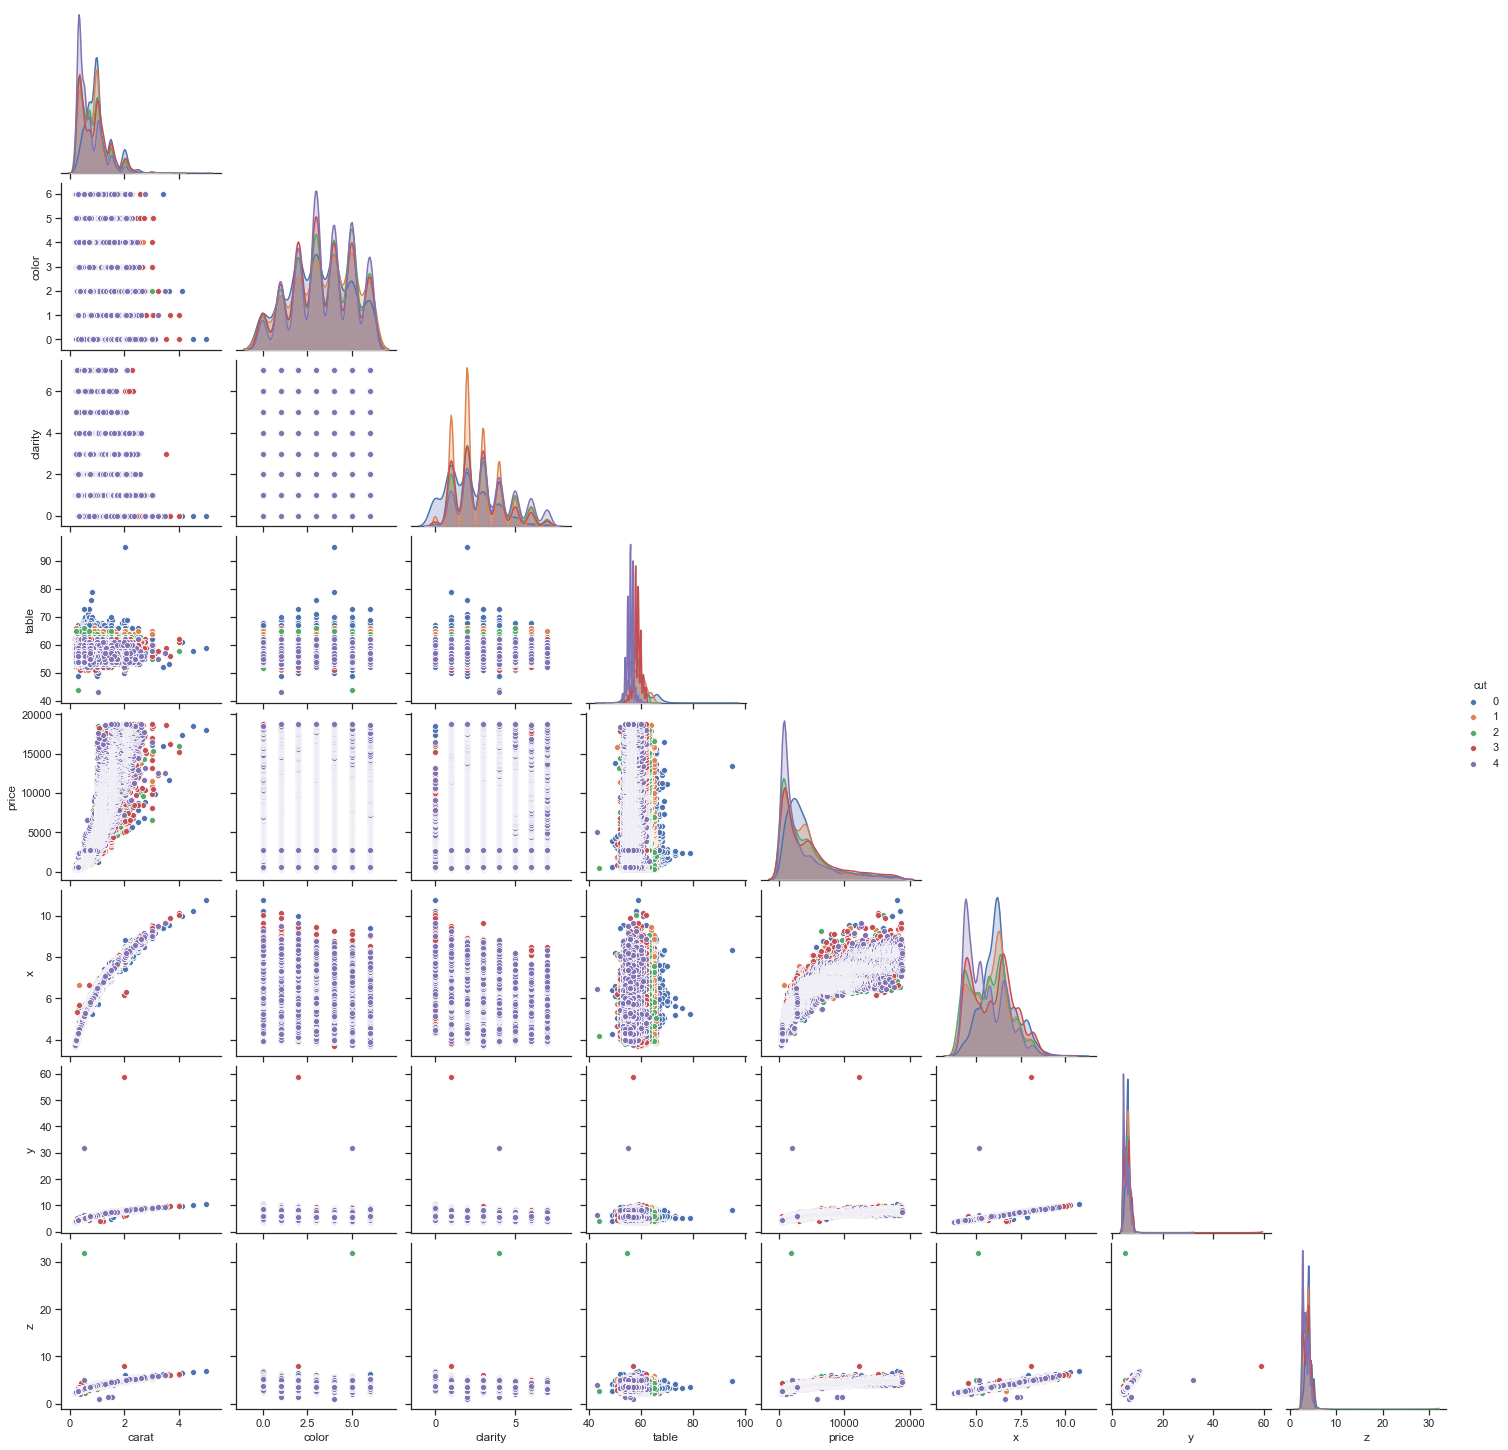

In [18]:
sns.pairplot(data, kind="scatter",hue="cut", corner = True)

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(['price'],1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=8)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
len(X_train)

43136

In [22]:
len(y_test)

10784

In [23]:
len(X_test)

10784

In [24]:
len(y_train)

43136

<h1>Linear Regression</h1>

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
y_train= np.log(y_train)
y_test= np.log(y_test)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.exp(regr.predict(X_test))
print("accuracy: "+ str(regr.score(X_test,y_test)*100) + "%")
print("Mean squared error: {} ".format(mean_squared_error(np.exp(y_test),y_pred)))

accuracy: 97.54906773046453%
Mean squared error: 1077662.4089053639 


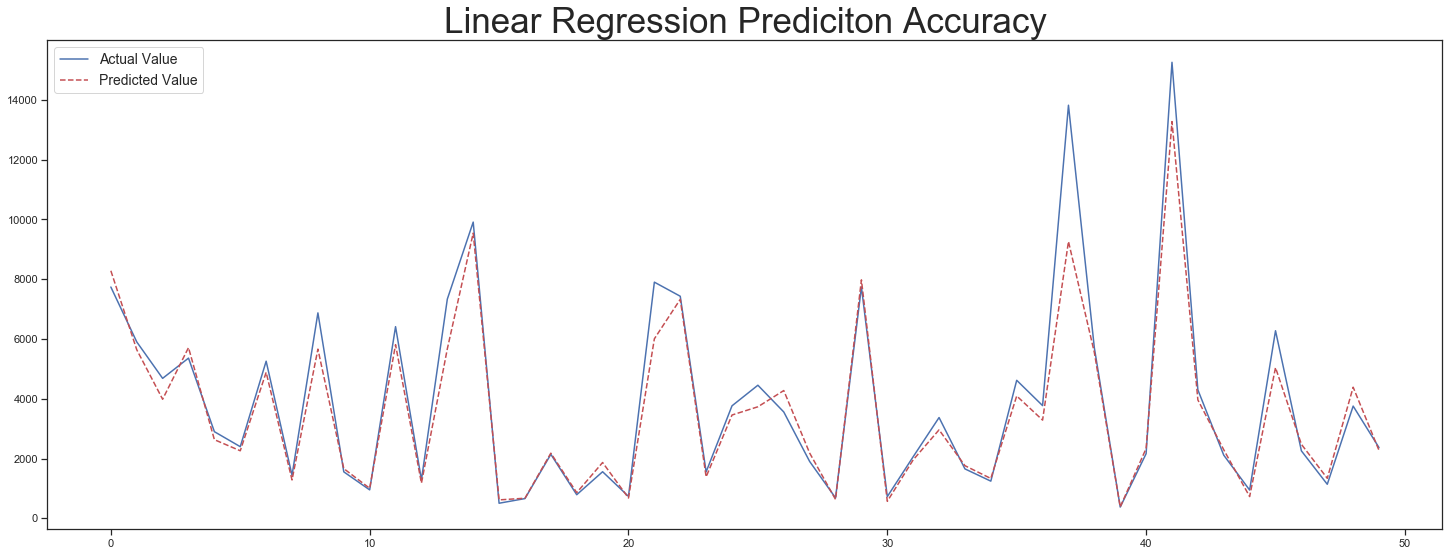

In [30]:
x_axis= list(range(0, 50, 1))
plt.figure(figsize=(25,9))
plt.title("Linear Regression Prediciton Accuracy", fontsize=35)
plt.plot(x_axis, np.exp(y_test[:50]), 'b-', label="Actual Value")
plt.plot(x_axis, y_pred[:50], 'r--', label="Predicted Value")
plt.legend(loc="upper left", fontsize=14)

# Feature Ranking

In [31]:
from sklearn.feature_selection import RFE

In [32]:
rfe=RFE(regr,6)

In [33]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=6, step=1, verbose=0)

In [34]:
    rfe.ranking_

array([1, 2, 1, 1, 1, 1, 3, 1])

In [35]:
pd.DataFrame(list(zip(X.columns,rfe.ranking_)),columns=['Features','Ranking'])

,Features,Ranking
0,carat,1
1,cut,2
2,color,1
3,clarity,1
4,table,1
5,x,1
6,y,3
7,z,1


In [36]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.859666



# Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor


In [38]:
regressor_dt = DecisionTreeRegressor(max_features=6, random_state=5)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [39]:
regressor_dt.predict(X_test)

array([1629.,  462., 7229., ..., 3886., 1279., 1279.])

In [40]:
#pd.DataFrame(regressor_dt.feature_importances_*100, X.columns)
pd.DataFrame(list(zip(X.columns,regressor_dt.feature_importances_*10)),columns=['Features','Importance'])

,Features,Importance
0,carat,6.299505
1,cut,0.019477
2,color,0.298390
3,clarity,0.667415
4,table,0.026575
5,x,0.042682
6,y,2.579422
7,z,0.066534


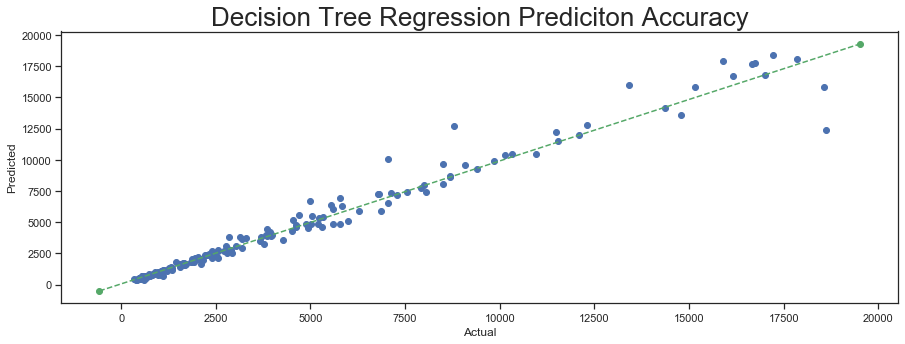

In [41]:
plt.figure(figsize=(15,5))
plt.scatter(y_test[:200],regressor_dt.predict(X_test[:200]))
plt.title("Decision Tree Regression Prediciton Accuracy", fontsize=26)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

In [42]:
#R2 Score for the Model
dt_score = regressor_dt.score(X_test, y_test)
print("Accuracy: "+ str(dt_score*100) + "%")

Accuracy: 96.5728682436586%
